In [18]:
from sklearn.base import BaseEstimator
import numpy as np

class MydummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1

        return pred
    

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace= True)
    df['Cabin'].fillna('N', inplace= True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId' , 'Name', 'Ticket'], axis = 1, inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size = 0.2, random_state= 12)

In [21]:
myclf = MydummyClassifier()
myclf.fit(X_train, y_train)

myprediction = myclf.predict(X_test)
print('{0:.4f}'.format(accuracy_score(y_test, myprediction)))

0.7486


In [22]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
digits = load_digits()

y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)

In [23]:
print(y_test.shape)
print(pd.Series(y_test).value_counts())

fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('{:.3f}'.format(accuracy_score(y_test, fakepred)))

(450,)
0    405
1     45
Name: count, dtype: int64
0.900


In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print(confusion)
    print('{0:.4f}, {1:.4f}, {2:.4f}'.format(accuracy, precision, recall))
    

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace= True)
    df['Cabin'].fillna('N', inplace= True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId' , 'Name', 'Ticket'], axis = 1, inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df


def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [27]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis=1)
x_titanic_df = transform_features(x_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, 
                                                    test_size = 0.2, random_state=11)
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)



[[104  14]
 [ 13  48]]
0.8492, 0.7742, 0.7869


C:\Users\abc\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(pred_proba.shape)
print(pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print(pred_proba_result[:3])

(179, 2)
[[0.46205513 0.53794487]
 [0.87870787 0.12129213]
 [0.8771721  0.1228279 ]]
[[0.46205513 0.53794487 1.        ]
 [0.87870787 0.12129213 0.        ]
 [0.8771721  0.1228279  0.        ]]


In [29]:
from sklearn.preprocessing import Binarizer
X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [30]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5

pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

[[104  14]
 [ 13  48]]
0.8492, 0.7742, 0.7869


In [31]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

[[104  14]
 [ 13  48]]
0.8492, 0.7742, 0.7869


In [32]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

[[98 20]
 [10 51]]
0.8324, 0.7183, 0.8361


In [33]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

[[98 20]
 [10 51]]
0.8324, 0.7183, 0.8361
[[103  15]
 [ 12  49]]
0.8492, 0.7656, 0.8033
[[104  14]
 [ 13  48]]
0.8492, 0.7742, 0.7869
[[109   9]
 [ 15  46]]
0.8659, 0.8364, 0.7541
[[112   6]
 [ 16  45]]
0.8771, 0.8824, 0.7377


In [34]:
np1 = [1,2,3,4,5]
npp = np.array(np1)
print(npp)
print(npp.reshape(-1,1))

[1 2 3 4 5]
[[1]
 [2]
 [3]
 [4]
 [5]]


In [37]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1= lr_clf.predict_proba(X_test)[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print(thresholds.shape)

thr_index = np.arange(0, thresholds.shape[0], 15)
print(thr_index)
print(np.round(thresholds[thr_index], 2))

print(np.round(precisions[thr_index], 3))
print(np.round(recalls[thr_index], 3))


(165,)
[  0  15  30  45  60  75  90 105 120 135 150]
[0.01 0.09 0.11 0.13 0.15 0.23 0.35 0.5  0.63 0.75 0.89]
[0.341 0.372 0.415 0.448 0.505 0.585 0.688 0.774 0.913 0.935 0.938]
[1.    1.    0.967 0.918 0.902 0.902 0.869 0.787 0.689 0.475 0.246]


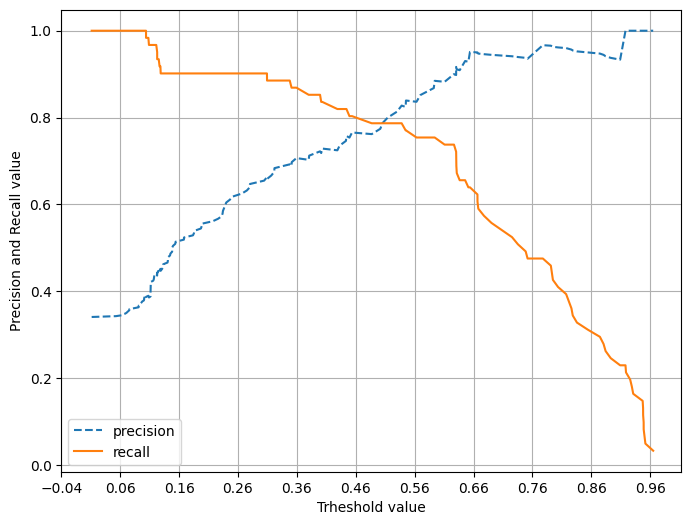

In [40]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_corve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Trheshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_corve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])



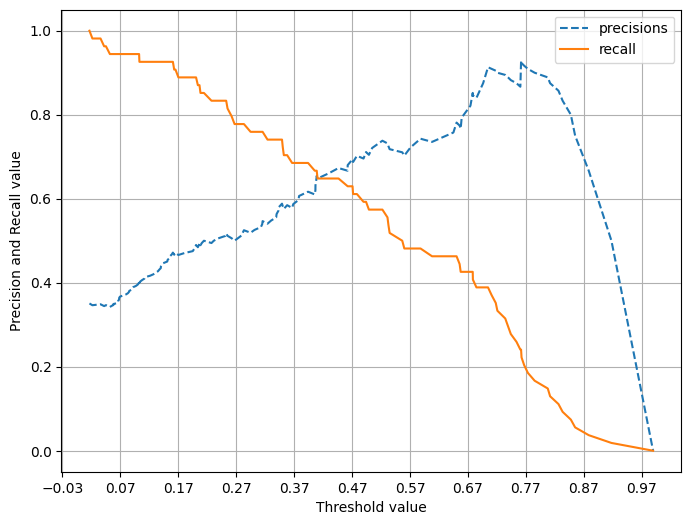

In [72]:
import matplotlib.pyplot as pd

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(8, 6))
    threshold_boundry = thresholds.shape[0]
    plt.plot(thresholds, precisions[:threshold_boundry], linestyle='--', label = 'precisions')
    plt.plot(thresholds, recalls[:threshold_boundry], label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel("Threshold value"); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_corve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score

In [54]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, confusion_matrix, recall_score

f1 = f1_score(y_test, pred)
print(f1)

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1= f1_score(y_test, pred)
    print(confusion)
    print('{0:.4f}, \n {1:.4f}, \n, {2:.4f}\n {3:.4f}'.format(accuracy, precision, recall, f1))


thresholds =[0.4 ,0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

0.7804878048780488
[[98 20]
 [10 51]]
0.8324, 
 0.7183, 
, 0.8361
 0.7727
[[103  15]
 [ 12  49]]
0.8492, 
 0.7656, 
, 0.8033
 0.7840
[[104  14]
 [ 13  48]]
0.8492, 
 0.7742, 
, 0.7869
 0.7805
[[109   9]
 [ 15  46]]
0.8659, 
 0.8364, 
, 0.7541
 0.7931
[[112   6]
 [ 16  45]]
0.8771, 
 0.8824, 
, 0.7377
 0.8036


In [55]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
thr_index =np.arange(1, thresholds.shape[0], 5)
print(thr_index)
print(np.round(thresholds[thr_index], 2))
print()
print(np.round(fprs[thr_index],3))
print(np.round(tprs[thr_index],3))

[ 1  6 11 16 21 26 31 36 41 46 51]
[0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]

[0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
[0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


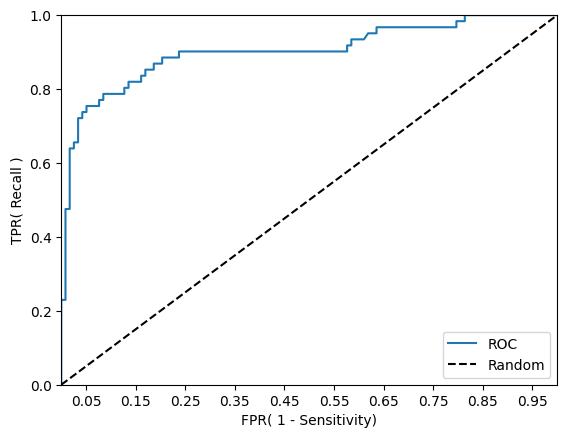

In [61]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label='Random')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity)'); plt.ylabel('TPR( Recall )')
    plt.legend()

roc_curve_plot(y_test, pred_proba[:,1])

In [62]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('{0:.4f}'.format(roc_score))

0.9024


In [63]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print(confusion)
    print(accuracy, precision, recall, f1, roc_auc)

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data.keys())

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [66]:
print(diabetes_data['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [67]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [68]:
diabetes_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [69]:
X= diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 156,
                                                    stratify=y)

lr_clf= LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]


get_clf_eval(y_test, pred, pred_proba)

[[88 12]
 [23 31]]
0.7727272727272727 0.7209302325581395 0.5740740740740741 0.6391752577319588 0.7918518518518518


C:\Users\abc\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


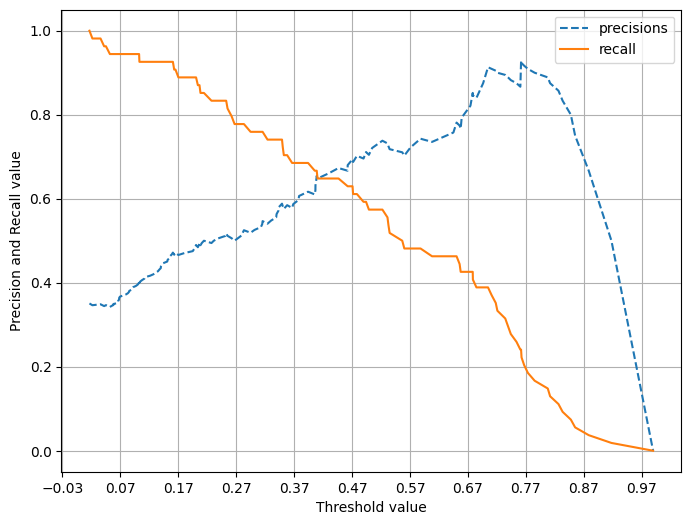

In [73]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [75]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

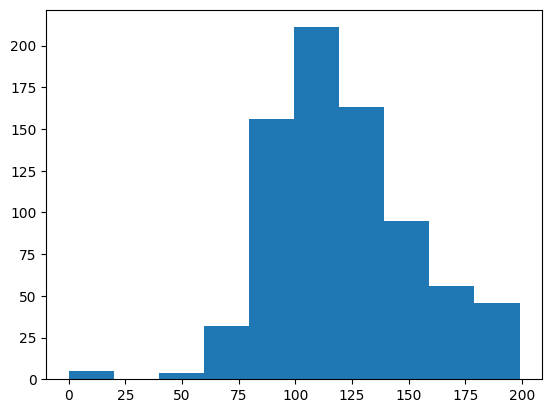

In [77]:
plt.hist(diabetes_data["Glucose"], bins=10)

In [ ]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThckness', 'Insulin', 'BMI']